In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import pickle

# Step 1 and 2 frame the problem and gathering the data

In [3]:
df=pd.read_csv('D:/Data/Placement1.csv')

In [4]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


# Step 3 Data preprocessig

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [7]:
df1=df.drop(['Unnamed: 0'],axis='columns')
df2=df[['cgpa','iq','placement']]
df2.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [8]:
df1.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [9]:
df.shape

(100, 4)

# Step 4 Exploratory Data Analysis(EDA)
# Visulization,EDA,Feature selection

Text(0, 0.5, 'iq')

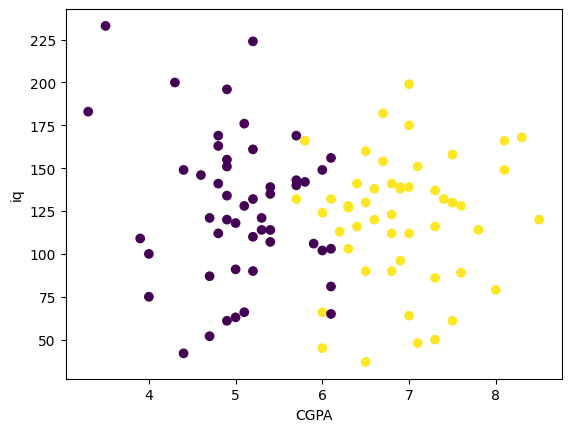

In [11]:
plt.scatter(df1['cgpa'],df1['iq'],c=df['placement'])
plt.xlabel('CGPA')
plt.ylabel('iq')

# Steop 5 Feature engineering

In [13]:
X=df1.iloc[:,0:2]
Y=df1.iloc[:,-1]

In [14]:
X.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [15]:
Y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

# Step 6 Model training ,Evaluation,selection

In [17]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

# Scale the data not a mandantory but scale no any damage the data

In [19]:
scaler=StandardScaler()

In [20]:
X_train=scaler.fit_transform(X_train)

In [21]:
X_train

array([[ 1.21245252,  0.31496178],
       [ 0.76923267,  0.41304676],
       [-0.64907084,  0.90347167],
       [-0.91500275,  0.7563442 ],
       [-0.91500275,  0.24139804],
       [ 0.85787664,  0.33948302],
       [ 0.85787664, -0.69040929],
       [-0.73771481,  0.09427057],
       [-0.11720703,  0.437568  ],
       [-0.4717829 ,  0.36400427],
       [-1.3582226 , -2.01455655],
       [-0.205851  ,  0.46208925],
       [ 0.06008091, -1.42604666],
       [-2.33330626,  1.44293907],
       [-0.91500275,  1.76171527],
       [-0.91500275, -0.1018994 ],
       [-1.80144245, -0.3716331 ],
       [ 0.06008091, -1.94099282],
       [-0.205851  ,  1.09964164],
       [ 0.23736885, -0.27354812],
       [-0.4717829 , -0.24902687],
       [ 0.06008091, -0.00381442],
       [ 0.32601282, -0.51876057],
       [-0.82635878, -1.4996104 ],
       [-1.09229069, -1.7693441 ],
       [-1.00364672, -0.29806936],
       [ 0.50330076, -0.83753677],
       [ 0.14872488,  0.19235555],
       [ 1.21245252,

# Apply just transform because pattern we know

In [22]:
X_test= scaler.transform(X_test)

In [23]:
X_test

array([[-0.73771481, -1.42604666],
       [ 1.21245252, -0.19998438],
       [ 0.32601282,  0.06974932],
       [ 1.92160427,  1.0260779 ],
       [ 0.06008091,  0.60921672],
       [-1.09229069, -0.07737815],
       [ 0.76923267, -0.83753677],
       [ 1.47838442,  0.09427057],
       [-0.205851  ,  0.19235555],
       [ 1.47838442, -0.86205801]])

# Now model Selection and training

In [25]:
model=LogisticRegression()

In [26]:
model.fit(X_train,Y_train)

LogisticRegression()

# Step 7 model evaluation (check the score),Testing

In [28]:
model.predict(X_test)

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [29]:
Y_test

9     0
72    1
70    1
65    1
33    0
24    0
35    1
30    1
87    1
42    1
Name: placement, dtype: int64

# Look at the above predict value 1,1 means above 2 number replace but y-test data in which not

In [31]:
y_predict=model.predict(X_test)

In [32]:
accuracy_score(Y_test,y_predict)

0.9

# Get nine time accurate but 1 time error

# Now how to check model decision boundary

<AxesSubplot:>

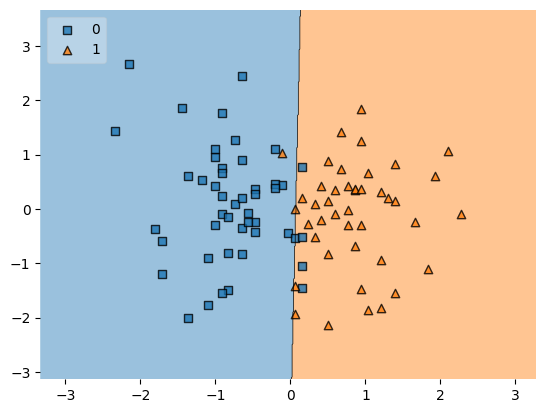

In [36]:
plot_decision_regions(X_train,Y_train.values,clf=model,legend=2)

# Step 8 
# Now our module is train,convert website to deply

In [124]:
pickle.dump(clf,open("model.pk","wb"))

# Step 9 Deployment